In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import export_graphviz

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import make_scorer,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [5]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
print(data.feature_names)
print("\n")
df['target']=data.target
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[data.feature_names],df['target'])
print(len(x_train))
print(len(x_test))

112
38


In [9]:
DT=DecisionTreeClassifier(criterion="gini")

In [10]:
model=DT.fit(x_train,y_train)
y_preds=model.predict(x_test)
print(y_preds)
print(data.feature_names)
print("\n")

[2 1 2 2 1 1 2 2 1 2 2 2 1 2 2 0 0 2 0 1 0 0 0 0 2 0 2 2 1 2 0 1 1 1 1 2 2
 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




[Text(1240.0, 1730.2083333333333, 'petal width (cm) <= 0.8\ngini = 0.662\nsamples = 112\nvalue = [41, 40, 31]\nclass = setosa'),
 Text(930.0, 1415.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(1550.0, 1415.625, 'petal length (cm) <= 4.95\ngini = 0.492\nsamples = 71\nvalue = [0, 40, 31]\nclass = versicolor'),
 Text(620.0, 1101.0416666666667, 'petal width (cm) <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(310.0, 786.4583333333335, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(930.0, 786.4583333333335, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(620.0, 471.875, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(1240.0, 471.875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(2480.0, 1101.0416666666667, 'petal width (cm) <= 1.75\ngini = 0.121\nsamples = 31\nvalue = [0, 2, 29]\nclass = virginica

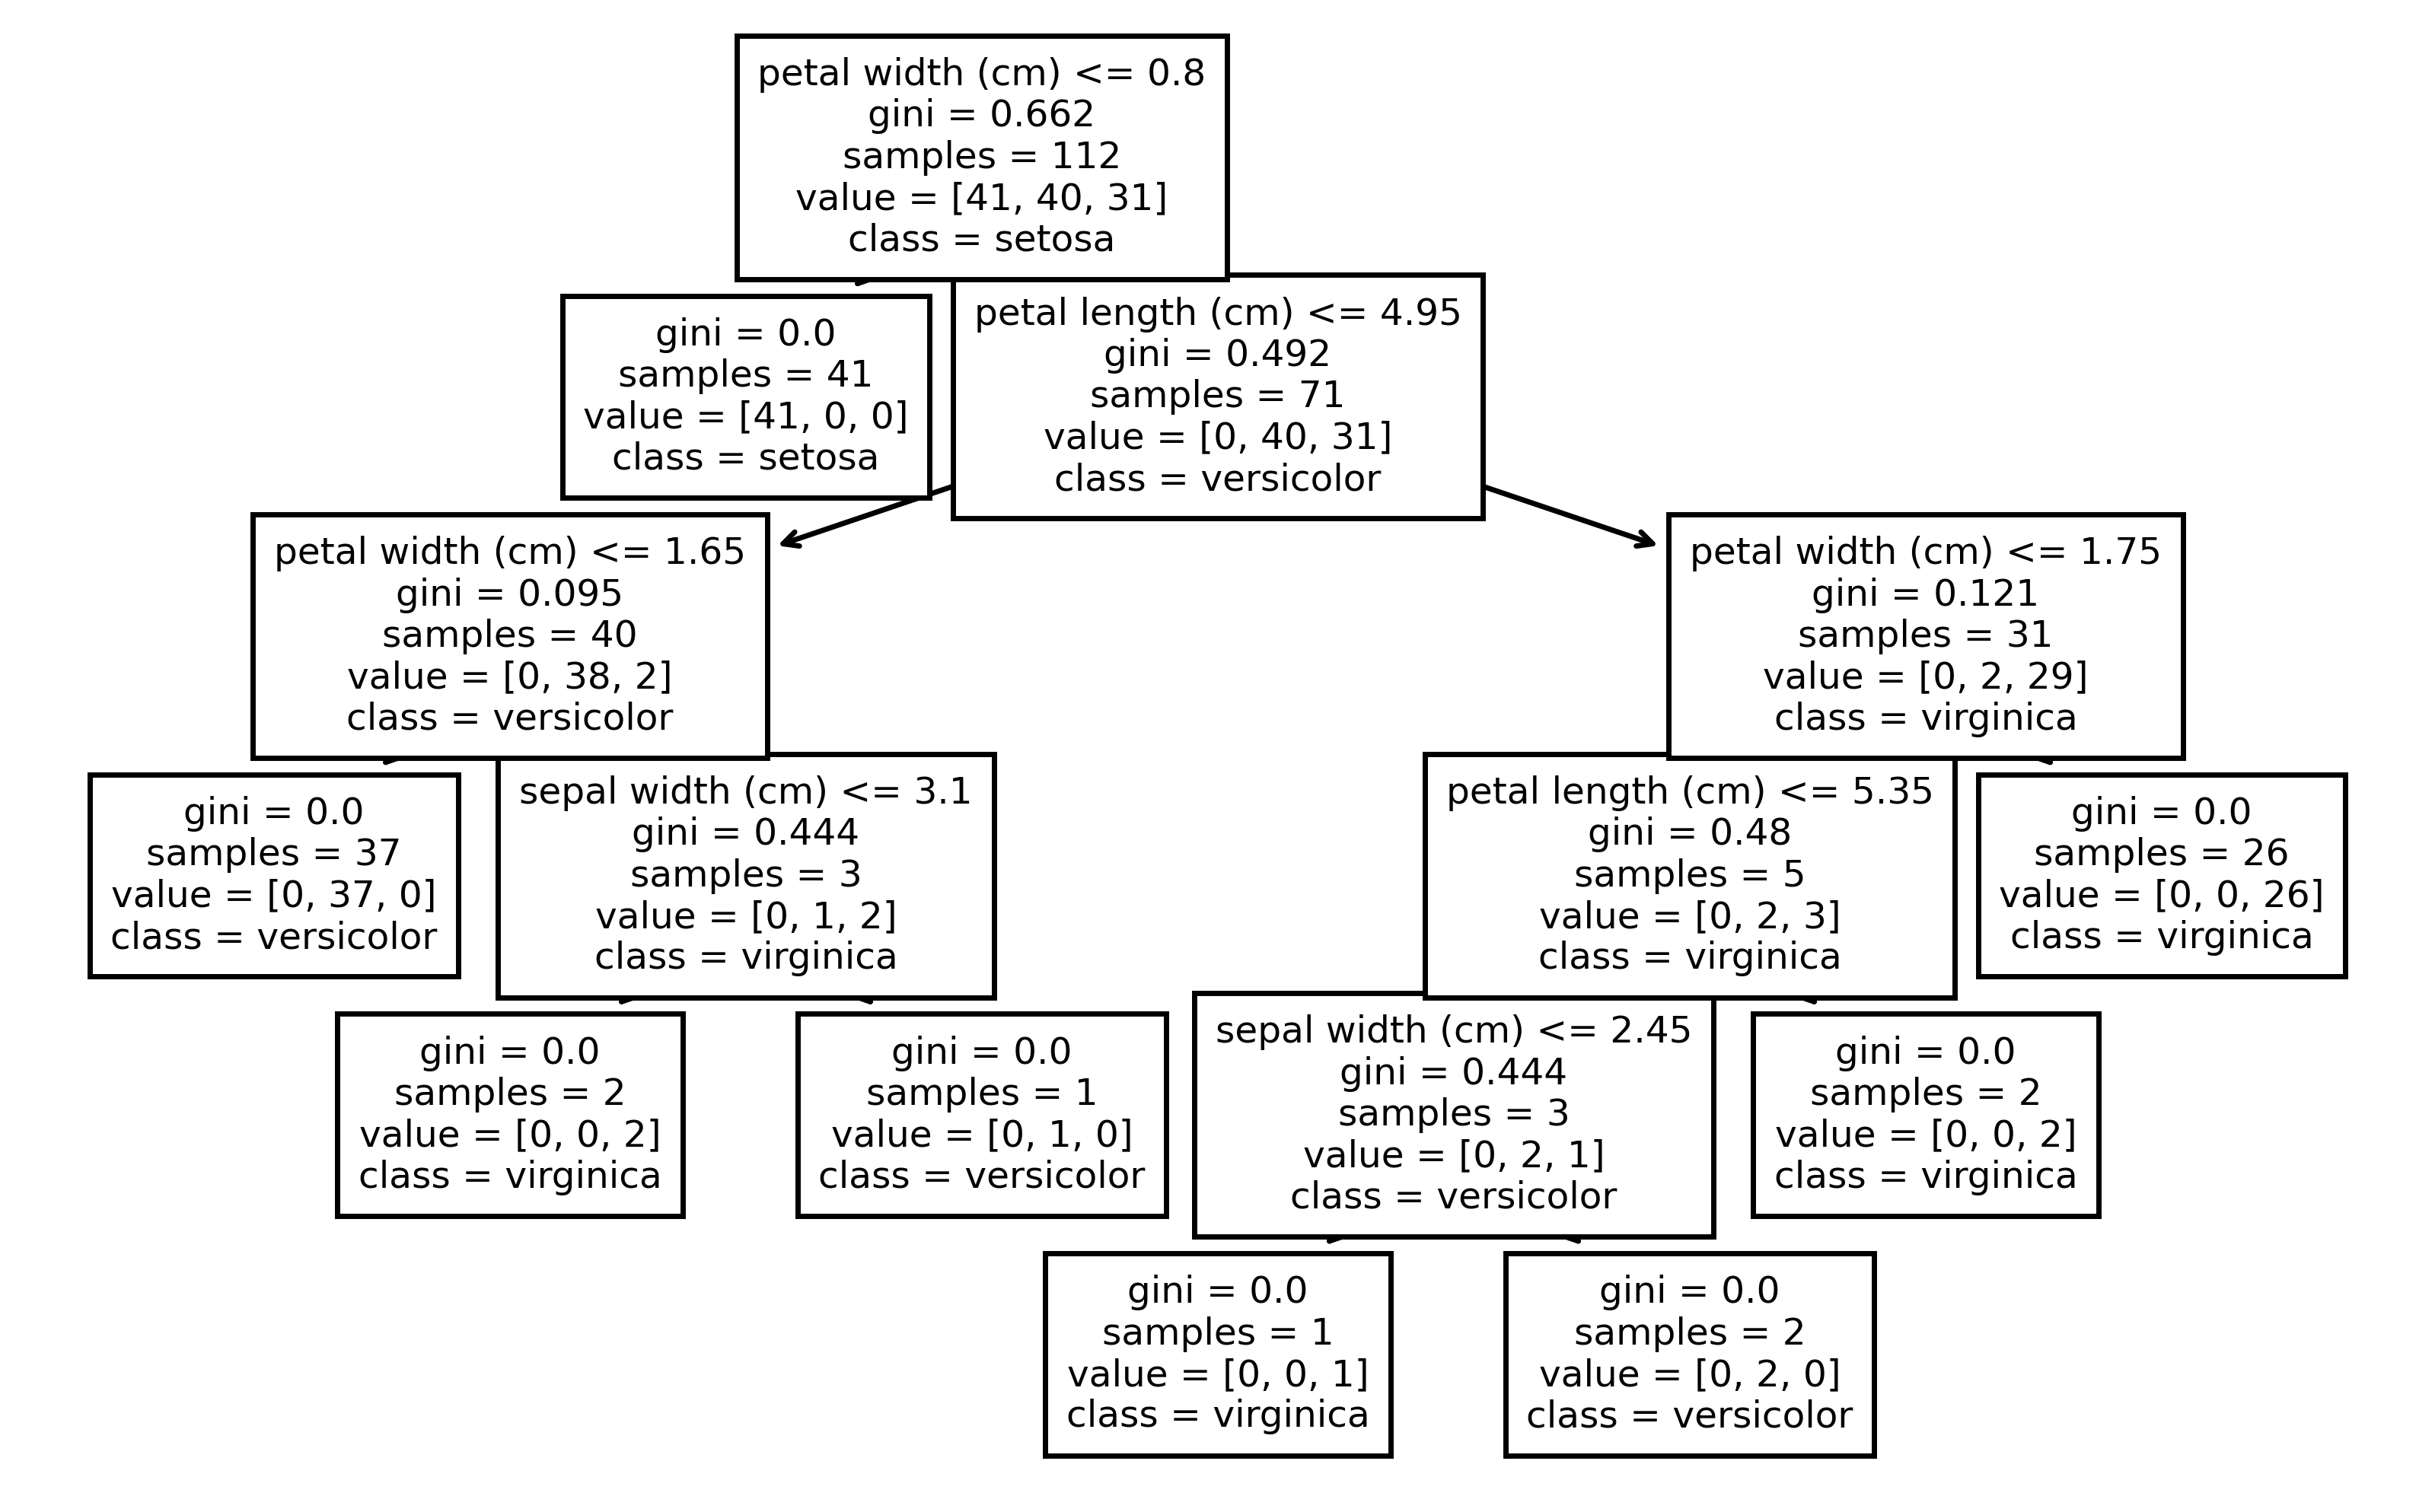

In [11]:
axes=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(DT,fontsize=7,feature_names=data.feature_names,class_names=data.target_names)

In [12]:
labels=[0,1,2]
cmx=confusion_matrix(y_test,y_preds,labels)
print("\n confustion matrix: \n",cmx)
print("\n")
print(classification_report(y_test,y_preds))


 confustion matrix: 
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  1 18]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



D:\Users\dhany\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
